In [1]:
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
data_amount_y = pd.read_pickle('./data_amount_y.pkl')

In [4]:
pd.set_option('display.max_columns',None)
data_amount_y.head()

,channel_id,source_id,create_time,reg_date,amount,paper_use_amount,click_num,down_num,pv,create_role_num,user_id,cp_server_no,cp_role_id,role_created_login_num,role_created_active,role_created_online,max_role_level,ip_num,pay_num,pay_sum,active_0-8,active_8-12,active_12-14,active_14-18,active_18-24,pay_grade_1,pay_grade_2,pay_grade_3,pay_grade_4,pay_grade_5,pay_grade_6,pay_rate,pay_avg,role_created_30_pay_sum,cpc,source_pay_sum,b_r,m_r,s_r,rubbish,common,ROI
0,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100261967,660192,13814061,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,1,0,0.0
1,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100262535,660191,13814172,40.0,3.0,50265.0,57.0,2.0,0.0,0.0,68.0,33.0,7.0,27.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,0,1,0.0
2,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100262535,660192,13814172,27.0,3.0,46271.0,57.0,2.0,0.0,0.0,35.0,16.0,0.0,27.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,0,1,0.0
3,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100262535,660193,13814172,19.0,3.0,25424.0,54.0,2.0,0.0,0.0,14.0,12.0,18.0,15.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,0,1,0.0
4,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100268013,660192,13815011,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,1,0,0.0


In [5]:
data_amount_m = data_amount_y[(data_amount_y['ROI']>=0.5)&(data_amount_y['ROI']<=0.8)]

In [6]:
source_grade_1 = data_amount_m[data_amount_m['amount']>=30000]
source_grade_2 = data_amount_m[(data_amount_m['amount']<30000)&(data_amount_m['amount']>=10000)]
source_grade_3 = data_amount_m[(data_amount_m['amount']<10000)&(data_amount_m['amount']>=2000)]
source_grade_4 = data_amount_m[(data_amount_m['amount']<2000)&(data_amount_m['amount']>=500)]
source_grade_5 = data_amount_m[data_amount_m['amount']<500]

0.001773067110590136
0.009929175819304761
0.010904362730129336
0.5683468119268315
0.40904658241314434


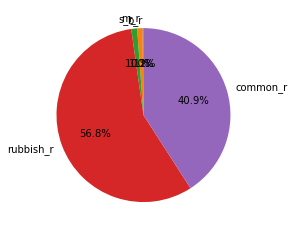

In [9]:
# source_grade_1的用户质量分布
b_r = source_grade_1['b_r'].sum()/source_grade_1.shape[0]
m_r = source_grade_1['m_r'].sum()/source_grade_1.shape[0]
s_r = source_grade_1['s_r'].sum()/source_grade_1.shape[0]
rubbish_r = source_grade_1['rubbish'].sum()/source_grade_1.shape[0]
common_r = source_grade_1['common'].sum()/source_grade_1.shape[0]
print(b_r)
print(m_r)
print(s_r)
print(rubbish_r)
print(common_r)
label_list = ['b_r','m_r','s_r','rubbish_r','common_r']
size = [b_r,m_r,s_r,rubbish_r,common_r]
plt.pie(size,labels=label_list,autopct="%1.1f%%",startangle=90,pctdistance=0.6)
plt.show()

0.001968009663606072
0.009582171189695773
0.010444023697550845
0.5729554754779209
0.40505031997122637


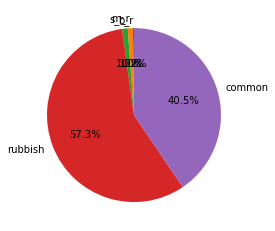

In [10]:
# source_grade_2的用户质量分布
b_r_2 = source_grade_2['b_r'].sum()/source_grade_2.shape[0]
m_r_2 = source_grade_2['m_r'].sum()/source_grade_2.shape[0]
s_r_2 = source_grade_2['s_r'].sum()/source_grade_2.shape[0]
rubbish_2 = source_grade_2['rubbish'].sum()/source_grade_2.shape[0]
common_2 = source_grade_2['common'].sum()/source_grade_2.shape[0]
print(b_r_2)
print(m_r_2)
print(s_r_2)
print(rubbish_2)
print(common_2)
label_list = ['b_r','m_r','s_r','rubbish','common']
size = [b_r_2, m_r_2, s_r_2, rubbish_2, common_2]
plt.pie(size,labels=label_list,autopct="%1.1f%%",startangle=90,pctdistance=0.6)
plt.show()

0.001984009224795028
0.01249756238182851
0.011056188158686824
0.5844433327963507
0.39001890743833884


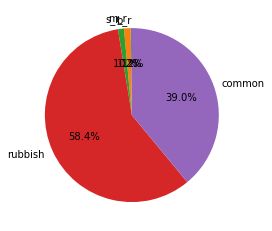

In [11]:
# source_grade_3的用户质量分布
b_r_3 = source_grade_3['b_r'].sum()/source_grade_3.shape[0]
m_r_3 = source_grade_3['m_r'].sum()/source_grade_3.shape[0]
s_r_3 = source_grade_3['s_r'].sum()/source_grade_3.shape[0]
rubbish_3 = source_grade_3['rubbish'].sum()/source_grade_3.shape[0]
common_3 = source_grade_3['common'].sum()/source_grade_3.shape[0]
print(b_r_3)
print(m_r_3)
print(s_r_3)
print(rubbish_3)
print(common_3)
label_list = ['b_r','m_r','s_r','rubbish','common']
size = [b_r_3, m_r_3, s_r_3, rubbish_3, common_3]
plt.pie(size,labels=label_list,autopct="%1.1f%%",startangle=90,pctdistance=0.6)
plt.show()

0.0
0.022928417480625487
0.00985921951666896
0.564956206722612
0.40225615628009354


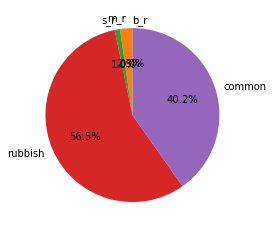

In [12]:
# source_grade_4的用户质量分布
b_r_4 = source_grade_4['b_r'].sum()/source_grade_4.shape[0]
m_r_4 = source_grade_4['m_r'].sum()/source_grade_4.shape[0]
s_r_4 = source_grade_4['s_r'].sum()/source_grade_4.shape[0]
rubbish_4 = source_grade_4['rubbish'].sum()/source_grade_4.shape[0]
common_4 = source_grade_4['common'].sum()/source_grade_4.shape[0]
print(b_r_4)
print(m_r_4)
print(s_r_4)
print(rubbish_4)
print(common_4)
label_list = ['b_r','m_r','s_r','rubbish','common']
size = [b_r_4, m_r_4, s_r_4, rubbish_4, common_4]
plt.pie(size,labels=label_list,autopct="%1.1f%%",startangle=90,pctdistance=0.6)
plt.show()

0.0
0.04895960832313342
0.033659730722154224
0.4730722154222766
0.44430844553243576


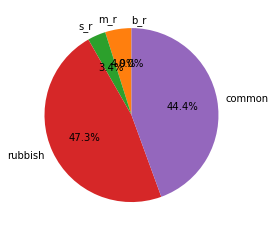

In [13]:
# source_grade_5的用户质量分布
b_r_5 = source_grade_5['b_r'].sum()/source_grade_5.shape[0]
m_r_5 = source_grade_5['m_r'].sum()/source_grade_5.shape[0]
s_r_5 = source_grade_5['s_r'].sum()/source_grade_5.shape[0]
rubbish_5 = source_grade_5['rubbish'].sum()/source_grade_5.shape[0]
common_5 = source_grade_5['common'].sum()/source_grade_5.shape[0]
print(b_r_5)
print(m_r_5)
print(s_r_5)
print(rubbish_5)
print(common_5)
label_list = ['b_r','m_r','s_r','rubbish','common']
size = [b_r_5, m_r_5, s_r_5, rubbish_5, common_5]
plt.pie(size,labels=label_list,autopct="%1.1f%%",startangle=90,pctdistance=0.6)
plt.show()

In [14]:
print(source_grade_1.shape[0]/data_amount_m.shape[0])
print(source_grade_2.shape[0]/data_amount_m.shape[0])
print(source_grade_3.shape[0]/data_amount_m.shape[0])
print(source_grade_4.shape[0]/data_amount_m.shape[0])
print(source_grade_5.shape[0]/data_amount_m.shape[0])

0.2601317070670835
0.37758673704709683
0.3022164710705683
0.05587813252703326
0.004186952288218111


In [15]:
soure_amout_y = data_amount_m[['channel_id','source_id','create_time','reg_date','amount','paper_use_amount','click_num','down_num',
              'create_role_num','cpc','source_pay_sum']]

In [16]:
soure_amout_y.drop_duplicates(['channel_id','source_id','reg_date'],inplace=True)

In [17]:
soure_amout_y.shape

(1309, 11)

In [18]:
source_grade_1_1 = soure_amout_y[soure_amout_y['amount']>=30000]
source_grade_1_2 = soure_amout_y[(soure_amout_y['amount']<30000)&(soure_amout_y['amount']>=10000)]
source_grade_1_3 = soure_amout_y[(soure_amout_y['amount']<10000)&(soure_amout_y['amount']>=2000)]
source_grade_1_4 = soure_amout_y[(soure_amout_y['amount']<2000)&(soure_amout_y['amount']>=500)]
source_grade_1_5 = soure_amout_y[soure_amout_y['amount']<500]

In [19]:
print(source_grade_1_1.shape[0]/soure_amout_y.shape[0])
print(source_grade_1_2.shape[0]/soure_amout_y.shape[0])
print(source_grade_1_3.shape[0]/soure_amout_y.shape[0])
print(source_grade_1_4.shape[0]/soure_amout_y.shape[0])
print(source_grade_1_5.shape[0]/soure_amout_y.shape[0])

0.03896103896103896
0.1627196333078686
0.44614209320091675
0.2727272727272727
0.07944996180290298


In [20]:
print('source_grade_1平均cpc:',round(source_grade_1_1[source_grade_1_1['create_role_num']!=0]['cpc'].mean(),2))
print('source_grade_2平均cpc:',round(source_grade_1_2[source_grade_1_2['create_role_num']!=0]['cpc'].mean(),2))
print('source_grade_3平均cpc:',round(source_grade_1_3[source_grade_1_3['create_role_num']!=0]['cpc'].mean(),2))
print('source_grade_4平均cpc:',round(source_grade_1_4[source_grade_1_4['create_role_num']!=0]['cpc'].mean(),2))
print('source_grade_5平均cpc:',round(source_grade_1_5[source_grade_1_5['create_role_num']!=0]['cpc'].mean(),2))

source_grade_1平均cpc: 48.51
source_grade_2平均cpc: 48.36
source_grade_3平均cpc: 35.15
source_grade_4平均cpc: 40.62
source_grade_5平均cpc: 37.71


In [30]:
source_grade_1_3.shape

(584, 11)

In [32]:
source_grade_1_3['source_pay_sum'].sum()

1670952.0

In [33]:
source_grade_1_4['source_pay_sum'].sum()

258742.0

In [34]:
print('source_grade_1平均30日ROI',round(source_grade_1_1['source_pay_sum'].sum()/source_grade_1_1['amount'].sum(),2))
print('source_grade_2平均30日ROI',round(source_grade_1_2['source_pay_sum'].sum()/source_grade_1_2['amount'].sum(),2))
print('source_grade_3平均30日ROI',round(source_grade_1_3['source_pay_sum'].sum()/source_grade_1_3['amount'].sum(),2))
print('source_grade_4平均30日ROI',round(source_grade_1_4['source_pay_sum'].sum()/source_grade_1_4['amount'].sum(),2))
print('source_grade_5平均30日ROI',round(source_grade_1_5['source_pay_sum'].sum()/source_grade_1_5['amount'].sum(),2))

source_grade_1平均30日ROI 0.64
source_grade_2平均30日ROI 0.64
source_grade_3平均30日ROI 0.64
source_grade_4平均30日ROI 0.64
source_grade_5平均30日ROI 0.63


In [22]:
print('source_grade_1平均创角数',round(source_grade_1_1['create_role_num'].mean(),2))
print('source_grade_2平均创角数',round(source_grade_1_2['create_role_num'].mean(),2))
print('source_grade_3平均创角数',round(source_grade_1_3['create_role_num'].mean(),2))
print('source_grade_4平均创角数',round(source_grade_1_4['create_role_num'].mean(),2))
print('source_grade_5平均创角数',round(source_grade_1_5['create_role_num'].mean(),2))

source_grade_1平均创角数 1977.9
source_grade_2平均创角数 701.12
source_grade_3平均创角数 204.32
source_grade_4平均创角数 61.27
source_grade_5平均创角数 14.79


In [23]:
data_amount_y.head()

,channel_id,source_id,create_time,reg_date,amount,paper_use_amount,click_num,down_num,pv,create_role_num,user_id,cp_server_no,cp_role_id,role_created_login_num,role_created_active,role_created_online,max_role_level,ip_num,pay_num,pay_sum,active_0-8,active_8-12,active_12-14,active_14-18,active_18-24,pay_grade_1,pay_grade_2,pay_grade_3,pay_grade_4,pay_grade_5,pay_grade_6,pay_rate,pay_avg,role_created_30_pay_sum,cpc,source_pay_sum,b_r,m_r,s_r,rubbish,common,ROI
0,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100261967,660192,13814061,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,1,0,0.0
1,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100262535,660191,13814172,40.0,3.0,50265.0,57.0,2.0,0.0,0.0,68.0,33.0,7.0,27.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,0,1,0.0
2,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100262535,660192,13814172,27.0,3.0,46271.0,57.0,2.0,0.0,0.0,35.0,16.0,0.0,27.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,0,1,0.0
3,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100262535,660193,13814172,19.0,3.0,25424.0,54.0,2.0,0.0,0.0,14.0,12.0,18.0,15.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,0,1,0.0
4,20953,252731,2020-01-02,2020-01-02,1562.56,1562.56,1552.0,55.0,53605.0,51.0,100268013,660192,13815011,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.638371,0.0,0,0,0,1,0,0.0


In [24]:
data_amount_y_1 = data_amount_y.drop_duplicates(['channel_id','source_id','reg_date'])

In [36]:
data_amount_y_1 = data_amount_y_1[data_amount_y_1['amount']>=500]

In [39]:
data_amount_y_1[data_amount_y_1['ROI']<0.5].shape[0]/data_amount_y_1.shape[0]

0.8505729737907038

In [40]:
data_amount_y_1[data_amount_y_1['ROI']<0.3].shape[0]/data_amount_y_1.shape[0]

0.7890397488748534

In [41]:
data_amount_y_1[data_amount_y_1['ROI']<0.2].shape[0]/data_amount_y_1.shape[0]

0.7333308119965205

In [42]:
data_amount_y_1[data_amount_y_1['ROI']<0.1].shape[0]/data_amount_y_1.shape[0]

0.6382133807344654

In [46]:
data_amount_y_1[data_amount_y_1['ROI']<0.2]['amount'].sum()

59843006.839999996

In [45]:
data_amount_y_1[data_amount_y_1['ROI']<0.2]['amount'].sum()/data_amount_y_1['amount'].sum()

0.5594135483286952